**PROBLEM EXPLANATION**

Employee turnover is a major challenge for organizations, leading to increased costs, reduced productivity, and disruptions in team operations. Understanding the key reasons behind employee attrition and predicting at-risk employees is crucial for implementing effective retention strategies.

The objective of this project is to analyze employee data, identify key drivers of attrition, and develop predictive models to enable proactive decision-making in workforce management.

Business Use Cases:
Employee Retention:
Identify at-risk employees and implement targeted strategies to reduce turnover.

Cost Optimization:
Reduce recruitment, training, and onboarding costs associated with high employee attrition.

Workforce Planning:
Utilize predictive insights to design employee retention strategies aligned with organizational goals and improve overall job satisfaction.

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv(r'..\Data\Employee-Attrition - Employee-Attrition (1).csv')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

CHECK NULL VALUES

In [7]:
df.isnull().sum().sum()

np.int64(0)

Consider Handling Outliers for Monthly Income  and Total Working Years

In [8]:
import seaborn as sns

<Axes: ylabel='MonthlyIncome'>

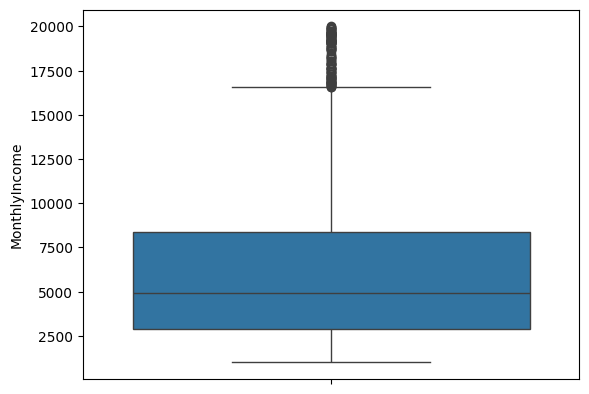

In [9]:
sns.boxplot(df['MonthlyIncome'])

<Axes: ylabel='TotalWorkingYears'>

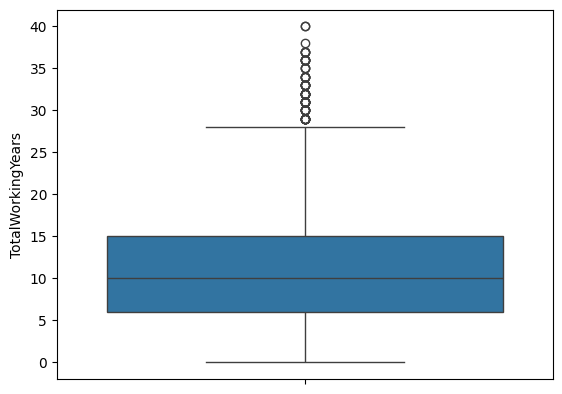

In [10]:
sns.boxplot(df['TotalWorkingYears'])

# Outliers handlling

WITH IQR METHOD

In [11]:
import pandas as pd

# Assuming df is your DataFrame
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Capping the outliers
    df[f'handled_{column}'] = df[column].clip(lower_bound, upper_bound)
    return df

# Apply the function to both columns
df = handle_outliers_iqr(df, 'MonthlyIncome')
df = handle_outliers_iqr(df, 'TotalWorkingYears')

# Rename the second column as per your requirement
df.rename(columns={'handled_TotalWorkingYears': 'outliersTotalWorkingyear'}, inplace=True)

# Display the updated DataFrame
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,handled_MonthlyIncome,outliersTotalWorkingyear
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,5993,8.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,5130,10.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,2090,7.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,2909,8.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,3468,6.0


In [12]:
df.to_csv(r'..\Data\Preprocessed_data.csv')

# NOW WE SELECT THE FEATURES OF THE REQUIREMENTS' PREDICITON

# 1.Predicting Employee Attrition (Turnover Prediction)

features to use : Age, Department, Monthly Income, Job Satisfaction, Years at Company, Marital Status, Overtime, etc.

In [54]:
df_Emp_att=pd.read_csv(r'..\Data\Preprocessed_data.csv')
del df_Emp_att['Unnamed: 0']

In [55]:
df_Emp_att.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,handled_MonthlyIncome,outliersTotalWorkingyear
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,5993,8.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,5130,10.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,2090,7.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,2909,8.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,3468,6.0


In [56]:
df_Emp_att.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'handled_MonthlyIncome',
       'outliersTotalWorkingyear'],
      dtype='object')

In [59]:
feature_of_emp_att=df_Emp_att[['Age','Department','handled_MonthlyIncome','JobSatisfaction','YearsAtCompany','MaritalStatus','OverTime','NumCompaniesWorked',]]

In [60]:
feature_of_emp_att.head()

,Age,Department,handled_MonthlyIncome,JobSatisfaction,YearsAtCompany,MaritalStatus,OverTime,NumCompaniesWorked
0,41,Sales,5993,4,6,Single,Yes,8
1,49,Research & Development,5130,2,10,Married,No,1
2,37,Research & Development,2090,3,0,Single,Yes,6
3,33,Research & Development,2909,3,8,Married,Yes,1
4,27,Research & Development,3468,2,2,Married,No,9


In [61]:
target_of_emp_att=df_Emp_att['Attrition']

# ENCODING THE CATEGORICAL COLUMNS

In [ ]:
feature_of_emp_att['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [62]:
feature_of_emp_att['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

Department and maritalstatus have muliclass and can't be ranked so we use onehot

ENCODING WITH ONEHOTENCODER

In [22]:
from sklearn.preprocessing import OneHotEncoder

generally get sparse output

In [63]:
ohe_for_emp_att=OneHotEncoder(sparse_output=False)

In [64]:
one_hot_Department=ohe_for_emp_att.fit_transform(feature_of_emp_att[['Department','MaritalStatus']])

In [65]:
encoded_df=pd.DataFrame(one_hot_Department,columns=ohe_for_emp_att.get_feature_names_out(['Department','MaritalStatus'])).astype(int)
encoded_df

,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,0,1,0,0,1
1,0,1,0,0,1,0
2,0,1,0,0,0,1
3,0,1,0,0,1,0
4,0,1,0,0,1,0
...,...,...,...,...,...,...
1465,0,1,0,0,1,0
1466,0,1,0,0,1,0
1467,0,1,0,0,1,0
1468,0,0,1,0,1,0


Loading the onehot in pickle 


In [34]:
import joblib 

In [66]:
joblib.dump(ohe_for_emp_att,r'..\Models\onehotencoderforemp_attri.pkl')

['..\\Models\\onehotencoderforemp_attri.pkl']

In [71]:
df_Emp_att['OverTime'].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

the column  overtime has binary values so we can take label encoding

In [33]:
from sklearn.preprocessing import LabelEncoder


In [36]:
le_for_emp_att=LabelEncoder()

In [67]:

# Assuming column_to_label is a list of categorical column names

feature_of_emp_att['OverTime'] = le_for_emp_att.fit_transform(feature_of_emp_att['OverTime'])


C:\Users\firea\AppData\Local\Temp\ipykernel_24784\665437544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_of_emp_att['OverTime'] = le_for_emp_att.fit_transform(feature_of_emp_att['OverTime'])


In [81]:
joblib.dump(le_for_emp_att,r'..\Models\labelforemployeeattri.pkl')

['..\\Models\\labelforemployeeattri.pkl']

checking the labels

In [85]:
import numpy as np

In [86]:
a=input().title()

overtime=le_for_emp_att.transform(np.array([a]).reshape(1,-1))
print(overtime)

[1]


d:\Projects\Employee-Attrition-Analysis-and-Prediction\venv\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1=yes and 0 = no

In [69]:
feature_of_emp_att.head()

,Age,Department,handled_MonthlyIncome,JobSatisfaction,YearsAtCompany,MaritalStatus,OverTime,NumCompaniesWorked
0,41,Sales,5993,4,6,Single,1,8
1,49,Research & Development,5130,2,10,Married,0,1
2,37,Research & Development,2090,3,0,Single,1,6
3,33,Research & Development,2909,3,8,Married,1,1
4,27,Research & Development,3468,2,2,Married,0,9


In [47]:
feature_of_emp_att['OverTime'].value_counts()

OverTime
0    1054
1     416
Name: count, dtype: int64

In [72]:
feature_of_emp_att.head()

,Age,Department,handled_MonthlyIncome,JobSatisfaction,YearsAtCompany,MaritalStatus,OverTime,NumCompaniesWorked
0,41,Sales,5993,4,6,Single,1,8
1,49,Research & Development,5130,2,10,Married,0,1
2,37,Research & Development,2090,3,0,Single,1,6
3,33,Research & Development,2909,3,8,Married,1,1
4,27,Research & Development,3468,2,2,Married,0,9


concating the featureofemp and encodeddf

In [73]:
feature_of_Employee_atr=pd.concat([feature_of_emp_att,encoded_df],axis=1)

In [75]:
feature_of_Employee_atr.head()

,Age,Department,handled_MonthlyIncome,JobSatisfaction,YearsAtCompany,MaritalStatus,OverTime,NumCompaniesWorked,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,Sales,5993,4,6,Single,1,8,0,0,1,0,0,1
1,49,Research & Development,5130,2,10,Married,0,1,0,1,0,0,1,0
2,37,Research & Development,2090,3,0,Single,1,6,0,1,0,0,0,1
3,33,Research & Development,2909,3,8,Married,1,1,0,1,0,0,1,0
4,27,Research & Development,3468,2,2,Married,0,9,0,1,0,0,1,0


dropping MaritalStatus and Department

In [77]:
feature_of_Employee_atr.drop(['Department','MaritalStatus'],axis=1,inplace=True)

In [78]:
feature_of_Employee_atr.head()

,Age,handled_MonthlyIncome,JobSatisfaction,YearsAtCompany,OverTime,NumCompaniesWorked,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,5993,4,6,1,8,0,0,1,0,0,1
1,49,5130,2,10,0,1,0,1,0,0,1,0
2,37,2090,3,0,1,6,0,1,0,0,0,1
3,33,2909,3,8,1,1,0,1,0,0,1,0
4,27,3468,2,2,0,9,0,1,0,0,1,0


In [79]:
feature_of_Employee_atr.to_csv(r'..\Data\feature0femployeeattrion.csv')

In [80]:
target_of_emp_att.to_csv(r'..\Data\target0femployeeattrion.csv')

# now we go for model selection for Employee Attrition

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb


In [89]:
models={'Logisticregression':LogisticRegression(),'decisiontreeclassifier':DecisionTreeClassifier(),'randomforestclassifier':RandomForestClassifier(),'xgboost':xgb.XGBClassifier()}

In [90]:
def Modeltrain(x_train,x_test,y_train,y_test):
 for name,model in models.items():
     print(f'************************************{name}********************************************')
     model.fit(x_train,y_train)

     print(f'trained with : {name}')

     predict=model.predict(x_test)
     predict_train=model.predict(x_train)

     accuracy_test=accuracy_score(y_test,predict)
     print(f'accuracy_score_test : {accuracy_test}')
     accuracy_train=accuracy_score(y_train,predict_train,)
     print(f'accuracy_score_train:{accuracy_train}')
     print('-----------------------------------------------------------------------------------')
     precision=precision_score(y_test,predict, average='weighted')
     print(f'precision_score_test:{precision}')
     precision_train=precision_score(y_train,predict_train,average='weighted')
     print(f'precision_train:{precision_train}')
     print('-----------------------------------------------------------------------------------')

     recall=recall_score(y_test,predict,average='weighted')
     print(f'recall_test:{recall}')
     recall_train=recall_score(y_train,predict_train,average='weighted')
     print(f'recallscore_train:{recall_train}')
     print('-----------------------------------------------------------------------------------')

     f1=f1_score(y_test,predict,average='weighted')
     print(f'f1_score_test:{f1}')
     f1_train=f1_score(y_train,predict_train,average='weighted')
     print(f'f1score_train:{f1_train}')

     print('-----------------------------------------------------------------------------------')
     #roc=roc_auc_score(y_test,predict,multi_class='ovr')
     #print(f'roc_auc_score_test:{roc}')
     #roc_train=roc_auc_score(y_train,predict_train,multi_class='ovr')
     #print(f'roc_auc_score(:{roc_train}')

     print('-----------------------------------------------------------------------------------')

     cr=classification_report(y_test,predict)
     print(cr)

     cm=confusion_matrix(y_test,predict)
     #print(f'[TN  FP  \n FN TP]:\n{cm}')





In [91]:
f_train1,f_test1,t_train1,t_test1=train_test_split(feature_of_Employee_atr,target_of_emp_att,stratify=target_of_emp_att)

In [92]:
Modeltrain(f_train1,f_test1,t_train1,t_test1)

************************************Logisticregression********************************************
trained with : Logisticregression
accuracy_score_test : 0.8396739130434783
accuracy_score_train:0.8421052631578947
-----------------------------------------------------------------------------------
precision_score_test:0.7867738774055596
precision_train:0.8277927451169056
-----------------------------------------------------------------------------------
recall_test:0.8396739130434783
recallscore_train:0.8421052631578947
-----------------------------------------------------------------------------------
f1_score_test:0.7715367862516829
f1score_train:0.7765997364971622
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
              precision    recall  f1-score   support

          No       0.84      1.00      0.91       309
         Yes       0.50      0.02      0.03     

d:\Projects\Employee-Attrition-Analysis-and-Prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


trained with : randomforestclassifier
accuracy_score_test : 0.8695652173913043
accuracy_score_train:0.9990925589836661
-----------------------------------------------------------------------------------
precision_score_test:0.8547395107111168
precision_train:0.999093540000981
-----------------------------------------------------------------------------------
recall_test:0.8695652173913043
recallscore_train:0.9990925589836661
-----------------------------------------------------------------------------------
f1_score_test:0.8465686087718629
f1score_train:0.9990915262846978
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
              precision    recall  f1-score   support

          No       0.88      0.98      0.93       309
         Yes       0.72      0.31      0.43        59

    accuracy                           0.87       368
   macro avg       0.80      0.64  

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['No' 'Yes']

in this logistic_regression give high score and low variance , and also we need to fewer the false negative -because we should not hire leaving person as genuine 

I have checked with LogisticRegression even though it have low variance and high score. But DecisionTreeClassifier gives perfect prediction 

In [171]:
decisionforemployeeattri=DecisionTreeClassifier()

In [172]:
decisionforemployeeattri.fit(f_train1,t_train1)

DecisionTreeClassifier()

In [2]:
import pandas as pd

In [5]:
feature_of_Employee_atr=pd.read_csv(r'..\Data\feature0femployeeattrion.csv')
del feature_of_Employee_atr['Unnamed: 0']

In [7]:
feature_of_Employee_atr.columns

Index(['Age', 'handled_MonthlyIncome', 'JobSatisfaction', 'YearsAtCompany',
       'OverTime', 'NumCompaniesWorked', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

In [6]:
feature_of_Employee_atr.head()

,Age,handled_MonthlyIncome,JobSatisfaction,YearsAtCompany,OverTime,NumCompaniesWorked,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,5993,4,6,1,8,0,0,1,0,0,1
1,49,5130,2,10,0,1,0,1,0,0,1,0
2,37,2090,3,0,1,6,0,1,0,0,0,1
3,33,2909,3,8,1,1,0,1,0,0,1,0
4,27,3468,2,2,0,9,0,1,0,0,1,0


In [174]:
ohe_for_emp_att=joblib.load(r'..\Models\onehotencoderforemp_attri.pkl')

In [175]:
le_for_emp_att=joblib.load(r'..\Models\labelforemployeeattri.pkl')

In [136]:
age = int(input())
handled_MonthlyIncome = int(input())
JobSatisfaction = int(input())
YearsAtCompany = int(input())
overtime = input().title()

# Transform overtime input
le_ot = le_for_emp_att.transform(np.array([overtime]).reshape(1, -1)).flatten()[0]  # Ensure it's a scalar

NumCompaniesWorked = int(input())

# Collect categorical inputs
user_data = {
    'Department': input().title(),
    'MaritalStatus': input().title()
}
user_df = pd.DataFrame([user_data])

# One-hot encode categorical inputs
encoded_user_input = ohe_for_emp_att.transform(user_df)

# Print inputs
print(f'age: {age}')
print(f'handled_MonthlyIncome: {handled_MonthlyIncome}')
print(f'JobSatisfaction: {JobSatisfaction}')
print(f'YearsAtCompany: {YearsAtCompany}')
print(f'overtime: {overtime}')
print(f'NumCompaniesWorked: {NumCompaniesWorked}')
print(f'decoded: {encoded_user_input}')

# Convert numerical inputs to a NumPy array
num_inputs = np.array([age, handled_MonthlyIncome, JobSatisfaction, YearsAtCompany, le_ot, NumCompaniesWorked]).reshape(1, -1)

# Concatenate numerical and categorical features
combined_input = np.concatenate([num_inputs, encoded_user_input], axis=1)

print("Combined Input using np.concatenate:", combined_input)


d:\Projects\Employee-Attrition-Analysis-and-Prediction\venv\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


age: 37
handled_MonthlyIncome: 2090
JobSatisfaction: 3
YearsAtCompany: 0
overtime: No
NumCompaniesWorked: 6
decoded: [[0. 1. 0. 0. 0. 1.]]
Combined Input using np.concatenate: [[3.70e+01 2.09e+03 3.00e+00 0.00e+00 0.00e+00 6.00e+00 0.00e+00 1.00e+00
  0.00e+00 0.00e+00 0.00e+00 1.00e+00]]


In [176]:
joblib.dump(decisionforemployeeattri,r'..\Models\decisionforemployeeattri.pkl')

['..\\Models\\decisionforemployeeattri.pkl']

In [177]:
decisionforemployeeattri=joblib.load(r'..\Models\decisionforemployeeattri.pkl')
decisionforemployeeattri

DecisionTreeClassifier()

In [105]:
target_of_emp_att.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [178]:
employee_attrition=decisionforemployeeattri.predict(combined_input)[0]


print(f'employeeattrition:{employee_attrition}')


employeeattrition:Yes


d:\Projects\Employee-Attrition-Analysis-and-Prediction\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [3]:
import pandas as pd
import joblib

In [4]:
d=joblib.load(r'..\Models\decisionforemployeeattri.pkl')

In [5]:
d.feature_names_in_

array(['Age', 'handled_MonthlyIncome', 'JobSatisfaction',
       'YearsAtCompany', 'OverTime', 'NumCompaniesWorked',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single'], dtype=object)